In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-online-retail-dataset/Online Retail Data.xlsx


In [44]:
import pandas as pd

In [45]:
# Load the dataset from the given path
file_path = '/kaggle/input/customer-online-retail-dataset/Online Retail Data.xlsx'

In [46]:
# Check available sheet names
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)


['Online Retail']


In [47]:
# Read the Excel file
df = pd.read_excel(file_path, sheet_name='Online Retail') 

In [48]:
# Display the first few rows of the dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [49]:
# Save the DataFrame to a CSV file
csv_file_path = 'online_retail_data.csv'
df.to_csv(csv_file_path, index=False)

print(f"Excel file has been successfully converted to CSV and saved as {csv_file_path}")

Excel file has been successfully converted to CSV and saved as online_retail_data.csv


In [50]:
df = pd.read_csv(csv_file_path) 

In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [52]:
df.shape

(541909, 8)

In [53]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [55]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [56]:
df.duplicated()
df.duplicated().sum()

5268

In [57]:
# Remove duplicates
df = df.drop_duplicates()

In [58]:
df.duplicated().sum()

0

In [59]:
# Drop rows with missing CustomerID 
df = df.dropna(subset=['CustomerID'])

In [60]:
# Remove negative values in 'Quantity' and 'UnitPrice'
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [61]:
# Convert 'InvoiceDate' to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("Data cleaned successfully!")

Data cleaned successfully!


**Normalize Data**

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
# Selecting relevant features for clustering
features = df[['Quantity', 'UnitPrice']]

In [64]:
# Normalize the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

print("Data normalization complete!")

Data normalization complete!


**Apply K-Means Clustering**

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [66]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

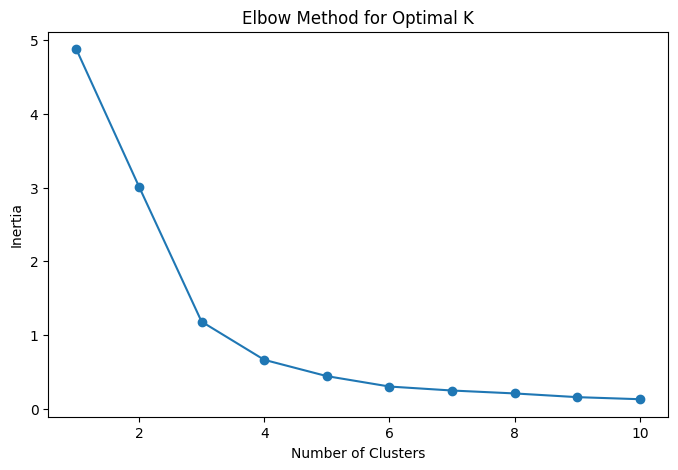

In [67]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [68]:
# Fit the K-Means model with the chosen number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("K-Means clustering applied successfully!")


K-Means clustering applied successfully!


**Visualize Results**

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

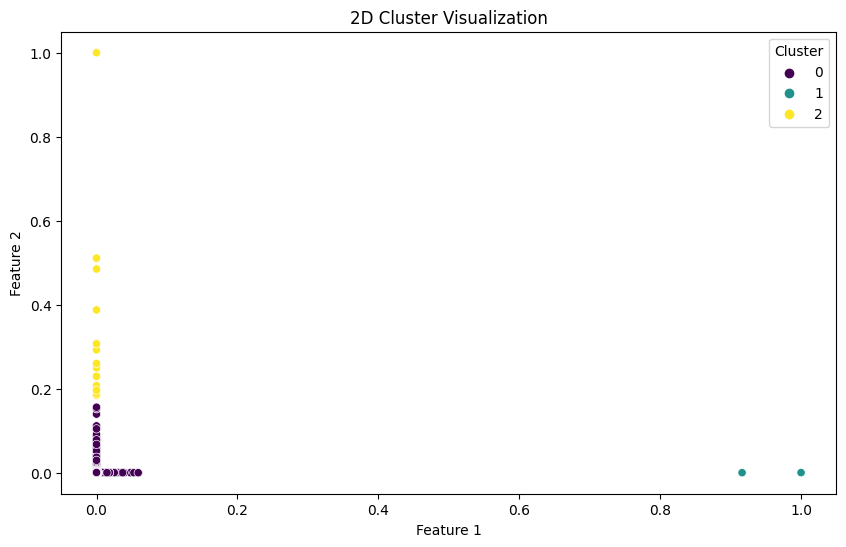

In [75]:
# Scatter plot for two features with cluster coloring
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('2D Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


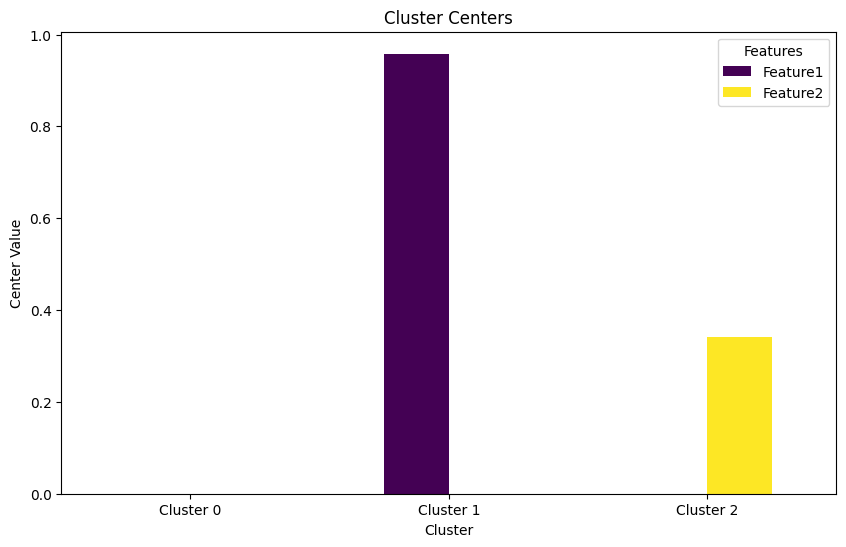

In [77]:
# Create a DataFrame for the cluster centers with the correct number of columns
centers_df = pd.DataFrame(cluster_centers, columns=['Feature1', 'Feature2'])

# Plotting cluster centers
centers_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Center Value')
plt.xticks(ticks=range(optimal_k), labels=[f'Cluster {i}' for i in range(optimal_k)], rotation=0)
plt.legend(title='Features')
plt.show()


In [76]:
print("Shape of scaled features:", scaled_features.shape)
print("Shape of cluster centers:", cluster_centers.shape)


Shape of scaled features: (392692, 2)
Shape of cluster centers: (3, 2)
